In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
data = pd.read_csv("/Users/vasan/OneDrive/Desktop/SDP/Datasets/apple_stock.csv")

In [ ]:
ma_day = [7, 14, 21]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(ma).mean()

In [ ]:
data['7DaysStd'] = data['Adj Close'].rolling(7).std()

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 7 days,MA for 14 days,MA for 21 days,7DaysStd
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800,NaN,NaN,NaN,NaN
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624954,260022000,NaN,NaN,NaN,NaN
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765111,271269600,NaN,NaN,NaN,NaN
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898558,318292800,NaN,NaN,NaN,NaN
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878097,394024400,NaN,NaN,NaN,NaN


In [ ]:
data.isna().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 7 days      6
MA for 14 days    13
MA for 21 days    20
7DaysStd           6
dtype: int64

In [ ]:
start_date = '2011-01-01'
end_date   = '2012-01-01'
na_data =yf.download('AAPL', start_date, end_date)
ma_day = [7, 14, 21]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    na_data[column_name] = na_data['Adj Close'].rolling(ma).mean()
na_data['7DaysStd'] = na_data['Adj Close'].rolling(7).std()

[*********************100%***********************]  1 of 1 completed


In [ ]:
na_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MA for 7 days,MA for 14 days,MA for 21 days,7DaysStd
Date,,,,,,,,,,
2011-12-23,14.274643,14.413929,14.267500,14.404643,12.316229,269399200,11.937316,11.912690,11.818064,0.301652
2011-12-27,14.396429,14.610357,14.393571,14.518929,12.413945,265076000,12.057673,11.946673,11.880533,0.299410
2011-12-28,14.531786,14.580357,14.333571,14.380000,12.295156,228662000,12.151987,11.976228,11.919096,0.242668
2011-12-29,14.407143,14.487500,14.303929,14.468571,12.370889,215978000,12.251928,12.007767,11.965511,0.129272
2011-12-30,14.411071,14.510000,14.410357,14.464286,12.367224,179662000,12.291407,12.032589,11.998665,0.113071


In [ ]:
data.shape

(2556, 11)

# Model 1

In [ ]:
mdf1 = pd.DataFrame({
                    'OC':list(np.abs(data['Open']-data['Close'])),
                    'HL':list(np.abs(data['High']-data['Low'])),
                     'MA for 7 days':list(data['MA for 7 days']),
                     'MA for 14 days':list(data['MA for 14 days']),
                     'MA for 21 days':list(data['MA for 21 days']),
                     'Close':list(data['Close']),
                     '7DaysStd':list(data['7DaysStd'])
                    })

In [ ]:
mdf1.isna().sum()

OC                 0
HL                 0
MA for 7 days      6
MA for 14 days    13
MA for 21 days    20
Close              0
7DaysStd           6
dtype: int64

In [ ]:
mdf1['MA for 7 days'].fillna(12.291406,inplace=True)
mdf1['MA for 14 days'].fillna(12.032589,inplace=True)
mdf1['MA for 21 days'].fillna(11.998664,inplace=True)
mdf1['7DaysStd'].fillna(0.113072,inplace=True)

In [ ]:
mdf1.isna().sum()

OC                0
HL                0
MA for 7 days     0
MA for 14 days    0
MA for 21 days    0
Close             0
7DaysStd          0
dtype: int64

In [ ]:
mdf1.shape

(2556, 7)

In [ ]:
mdf1.sample(10)

,OC,HL,MA for 7 days,MA for 14 days,MA for 21 days,Close,7DaysStd
1841,0.597500,1.072498,49.795249,49.272305,48.739061,50.167500,0.546873
450,0.161428,0.182142,15.561681,15.382331,15.293467,18.017857,0.200116
1828,0.485001,0.640003,47.998282,47.003091,46.490797,50.154999,0.633428
295,0.068571,0.243571,13.328960,13.618977,13.926273,15.418571,0.201005
987,0.934999,1.035000,26.957576,26.922813,26.950798,29.757500,0.298217
1044,0.042500,0.395000,22.226419,22.125850,22.094353,24.172501,0.183003
394,0.120001,0.282858,13.664005,13.512612,13.351638,16.190001,0.369960
2053,3.587502,4.550003,70.846678,75.051739,76.211317,72.330002,2.596814
2498,1.030014,3.600006,162.132063,159.940933,156.410149,165.320007,3.164395
711,0.005001,0.362499,23.733712,22.980004,22.816313,26.745001,0.343568


In [ ]:
X = mdf1.drop('Close',axis=1)
y = mdf1['Close']

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
X_scaled.shape

(2556, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.05)

In [ ]:
X_train.shape

(2306, 6)

In [ ]:
X_test.shape

(128, 6)

In [ ]:
y_train.shape

(2306,)

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model1 =models.Sequential()
model1.add(layers.Dense(32,activation='relu',input_dim=X_train.shape[1]))
model1.add(layers.Dense(16,activation='relu'))
model1.add(layers.Dense(8,activation='relu'))
model1.add(layers.Dense(4,activation='relu'))
model1.add(layers.Dense(1))

In [ ]:
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
X_train.shape

(2306, 6)

In [ ]:
y_train.shape

(2306,)

In [ ]:
history = model1.fit(X_train, y_train, validation_data= (X_val,y_val), epochs= 100)

Epoch 1/100
73/73 [==============================] - 1s 7ms/step - loss: 4214.2910 - val_loss: 4748.0640
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 4085.1062 - val_loss: 4226.6108
Epoch 3/100
73/73 [==============================] - 0s 5ms/step - loss: 2556.4456 - val_loss: 1155.0948
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 571.6946 - val_loss: 434.3860
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 376.1952 - val_loss: 307.1450
Epoch 6/100
73/73 [==============================] - 0s 5ms/step - loss: 263.0074 - val_loss: 206.2945
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 171.0551 - val_loss: 127.7869
Epoch 8/100
73/73 [==============================] - 0s 5ms/step - loss: 103.1866 - val_loss: 74.8867
Epoch 9/100
73/73 [==============================] - 0s 5ms/step - loss: 62.6865 - val_loss: 49.4719
Epoch 10/100
73/73 [==============================] - 0s 5ms/step - lo

In [ ]:
model2 =models.Sequential()
model2.add(layers.Dense(16,activation='relu',input_dim=X_train.shape[1]))
model2.add(layers.Dense(16,activation='relu'))
model2.add(layers.Dense(8,activation='relu'))
model2.add(layers.Dense(4,activation='relu'))
model2.add(layers.Dense(1))

In [ ]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history1 = model2.fit(X_train, y_train, validation_data= (X_val,y_val), epochs= 100)

Epoch 1/100
73/73 [==============================] - 1s 8ms/step - loss: 4207.1147 - val_loss: 4717.0283
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 3849.4832 - val_loss: 3690.4841
Epoch 3/100
73/73 [==============================] - 0s 5ms/step - loss: 1884.9766 - val_loss: 476.5558
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 332.6603 - val_loss: 224.6296
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 203.3480 - val_loss: 132.5302
Epoch 6/100
73/73 [==============================] - 0s 5ms/step - loss: 131.6903 - val_loss: 94.7908
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 93.9926 - val_loss: 71.5888
Epoch 8/100
73/73 [==============================] - 0s 6ms/step - loss: 68.0313 - val_loss: 50.5921
Epoch 9/100
73/73 [==============================] - 0s 5ms/step - loss: 48.2239 - val_loss: 34.5884
Epoch 10/100
73/73 [==============================] - 0s 5ms/step - loss: 3

In [ ]:
m1_val_loss = history.history['val_loss']
m1_train_loss = history.history['loss']
m2_val_loss = history1.history['val_loss']
m2_train_loss = history1.history['loss']

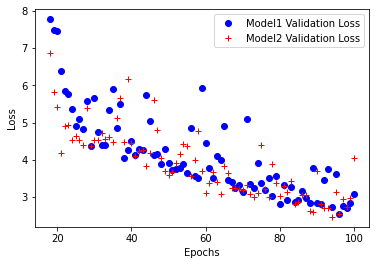

In [ ]:
epochs = range(18, len(m1_val_loss)+1)
plt.plot(epochs, m1_val_loss[17:], 'bo', label = 'Model1 Validation Loss')
plt.plot(epochs, m2_val_loss[17:], 'r+', label = 'Model2 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

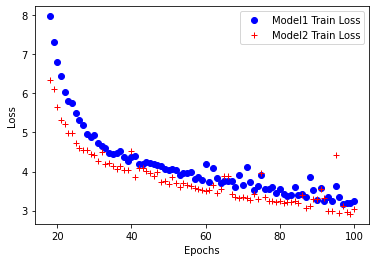

In [ ]:
epochs = range(18, len(m1_val_loss)+1)
plt.plot(epochs, m1_train_loss[17:], 'bo', label = 'Model1 Train Loss')
plt.plot(epochs, m2_train_loss[17:], 'r+', label = 'Model2 Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

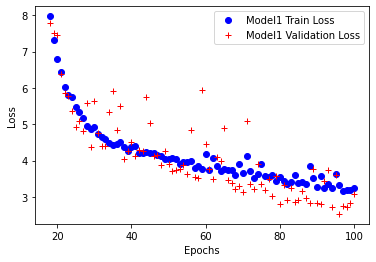

In [ ]:
epochs = range(18, len(m1_val_loss)+1)
plt.plot(epochs, m1_train_loss[17:], 'bo', label = 'Model1 Train Loss')
plt.plot(epochs, m1_val_loss[17:], 'r+', label = 'Model1 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

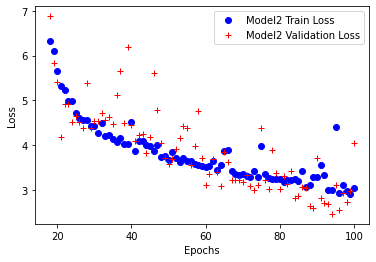

In [ ]:
epochs = range(18, len(m2_val_loss)+1)
plt.plot(epochs, m2_train_loss[17:], 'bo', label = 'Model2 Train Loss')
plt.plot(epochs, m2_val_loss[17:], 'r+', label = 'Model2 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

In [ ]:
y_pred1.shape

(128, 1)

In [ ]:
y_true = y_test.to_numpy().reshape((-1,1))

In [ ]:
error = np.sum(((y_pred1-y_true)**2))
size = y_pred1.shape[0]
mse = error/size
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 5.098623718492569
rmse: 2.2580132237195976


In [ ]:
error = np.sum(((y_pred2-y_true)**2))
size = y_pred2.shape[0]
mse = error/size
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 4.386896156919152
rmse: 2.094491861268301


# Model 2 

In [ ]:
mdf2 = data.filter(['Close'])
mdv2 = mdf2.values
train_len = int(np.ceil(len(mdv2)*0.95))

In [ ]:
print(f'Train Length:{train_len}')

Train Length:2429


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_mdv2 = scaler.fit_transform(mdv2)

In [ ]:
scaled_mdv2

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.88534034],
       [0.89789519],
       [0.89950167]])

In [ ]:
train_data = scaled_mdv2[0:int(train_len), :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from tensorflow.keras import models,layers
model3 = models.Sequential()
model3.add(layers.LSTM(units=128, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model3.add(layers.LSTM(units=128, return_sequences=True))
model3.add(layers.Dropout(0.1))
model3.add(layers.LSTM(units=128, return_sequences=True))
model3.add(layers.LSTM(units=128, return_sequences=True))
model3.add(layers.Dropout(0.1))
model3.add(layers.LSTM(units=128))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(units=1))

In [ ]:
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model3.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
75/75 [==============================] - 8s 34ms/step - loss: 0.0044
Epoch 2/150
75/75 [==============================] - 2s 33ms/step - loss: 0.0014
Epoch 3/150
75/75 [==============================] - 2s 33ms/step - loss: 9.0219e-04
Epoch 4/150
75/75 [==============================] - 2s 33ms/step - loss: 9.5751e-04
Epoch 5/150
75/75 [==============================] - 3s 34ms/step - loss: 7.0346e-04
Epoch 6/150
75/75 [==============================] - 2s 33ms/step - loss: 0.0013
Epoch 7/150
75/75 [==============================] - 2s 33ms/step - loss: 7.1709e-04
Epoch 8/150
75/75 [==============================] - 2s 33ms/step - loss: 6.6242e-04
Epoch 9/150
75/75 [==============================] - 3s 34ms/step - loss: 6.2182e-04
Epoch 10/150
75/75 [==============================] - 3s 38ms/step - loss: 5.6899e-04
Epoch 11/150
75/75 [==============================] - 3s 39ms/step - loss: 4.8733e-04
Epoch 12/150
75/75 [==============================] - 3s 38ms/step - loss: 

In [ ]:
test_data = scaled_mdv2[train_len - 60: , :]
x_test = []
y_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
y_test = mdv2[train_len:,:]

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
y_pred3 = model3.predict(x_test)

In [ ]:
y_pred3.shape

(127, 1)

In [ ]:
y_pred3 = scaler.inverse_transform(y_pred3)

In [ ]:
y_test.shape

(127, 1)

In [ ]:
error = np.sum(((y_pred3-y_test)**2))
size = y_pred3.shape[0]
mse = error/size
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mse: 19.835269374734413
rmse: 4.453680430243555


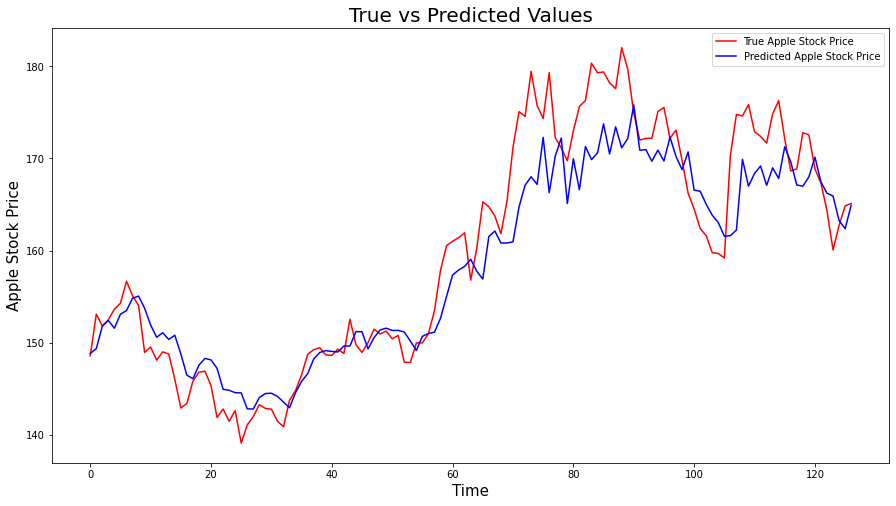

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color='r', label='True Apple Stock Price')
plt.plot(y_pred3, color='b', label='Predicted Apple Stock Price')
plt.title('True vs Predicted Values',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Apple Stock Price',fontsize=15)
plt.legend()
plt.show()